In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


The dataset consists 8000 rows of news articles and should be predicted whether they are related to the US economy or not. It is a binary classification and the dataset is imbalanced.

In [4]:
df = pd.read_csv('/content/full_economic_news_articles.csv', encoding='latin1')
df.head()

,relevance,articleid,date,headline,text
0,yes,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,no,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,no,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,no,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,yes,wsj_398838054,10-04-2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [5]:
df.shape

(8000, 5)

In [6]:
#studying the relevant article
df.loc[0, 'text']

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [7]:
#studying the irrelevant article
df.loc[1, 'text']

'The Wall Street Journal Online</br></br>The Morning Brief, a look at the day\'s biggest news, is emailed to subscribers by 7 a.m. every business day. Sign up for the e-mail here.</br></br>On Friday evening, with Congress out of town on its summer recess and Americans heading into a mid-August weekend, the Bush administration sent a message to the states: The federal government will make it tougher for a national children\'s insurance program to cover the offspring of middle-income families.</br></br>The State Children\'s Health Insurance Program was created in 1997 to help children whose families couldn\'t afford insurance but didn\'t qualify for Medicaid, and administration officials tell the New York Times that the changes are aimed at returning the program to its low- income focus and assuring it didn\'t become a replacement for private insurance. Administration point man Dennis Smith wrote to state officials saying there would be new restrictions on the District of Columbia and th

In [8]:
#distribution of target variable
df['relevance'].value_counts(normalize=True)


,proportion
relevance,
no,0.821375
yes,0.177500
not sure,0.001125


In [9]:
df['relevance'].value_counts()

,count
relevance,
no,6571
yes,1420
not sure,9


In [10]:
df['relevance'] = np.where(df['relevance'] == 'not sure', 'no' , df['relevance'])
df['relevance'].value_counts()

,count
relevance,
no,6580
yes,1420


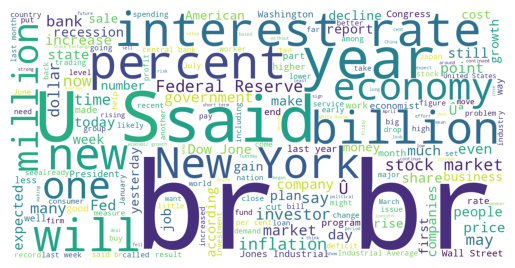

In [11]:
# wordcloud visualisation
wc_plot = WordCloud(background_color='white', height=800, width=1600).generate(' '.join(df['text']))
plt.imshow(wc_plot)
plt.axis('off')
plt.show()

In [12]:
# mapping the target column
df['relevance'] = df['relevance'].map({'yes': 1, 'no': 0})

In [13]:
df = df[['relevance', 'text']]
df.head()

,relevance,text
0,1,NEW YORK -- Yields on most certificates of dep...
1,0,The Wall Street Journal Online</br></br>The Mo...
2,0,WASHINGTON -- In an effort to achieve banking ...
3,0,The statistics on the enormous costs of employ...
4,1,NEW YORK -- Indecision marked the dollar's ton...


In [14]:
# defining input and output
X = df['text']
y = df['relevance']

In [15]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) #stratify since it is a classification problem
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6000,) (6000,)
(2000,) (2000,)


In [16]:
# define func for wordcloud
def display_wordcloud(data):
  wc_plot = WordCloud(background_color='white', height=800, width=1600).generate(' '.join(df['text']))
  plt.imshow(wc_plot)
  plt.axis('off')
  plt.show()

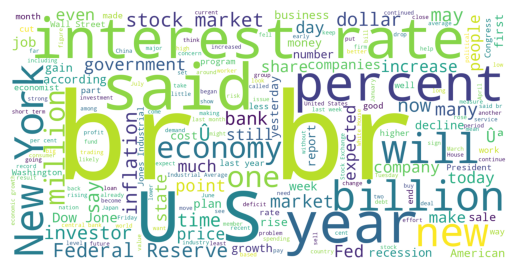

In [17]:
# wordlcoud for US economy articles
display_wordcloud(X_train[y_train == 1])

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
# preprocessing X_train data
def clean(doc):
    doc = doc.replace("</br>", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = doc.lower()
    tokens = nltk.word_tokenize(doc)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [20]:
# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 12.3 s, sys: 203 ms, total: 12.6 s
Wall time: 12.6 s
(6000, 39800)


In [21]:
# preprocessing on X_test (transform test data using X_train features)
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)

(2000, 39800)


In [22]:
# building a model
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [23]:
# evaluate on training data
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.8325

In [24]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[4193,  742],
       [ 263,  802]])

Text(0.5, 19.049999999999997, 'Predicted')

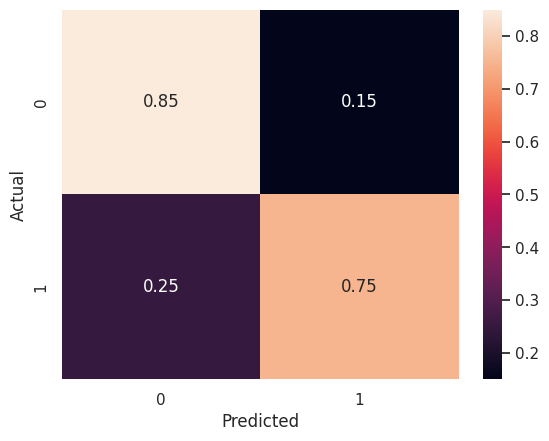

In [25]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
# evaluate on test data
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.7715

Text(0.5, 19.049999999999997, 'Predicted')

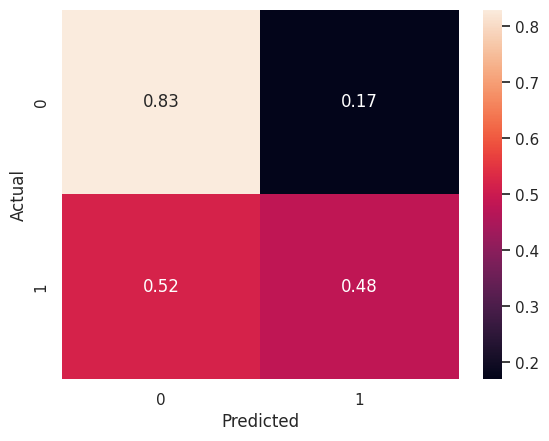

In [27]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [28]:
# Accuracy influenced because of data imbalance
# check for F1 score
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))
print()
print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.6147949405902645

Test Score (F1 Score): 0.42659974905897113


In [29]:
# optimal workflow
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 9min 7s, sys: 7.78 s, total: 9min 15s
Wall time: 9min 15s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function clean at 0x7d2511d19d00>)),
                ('nb', MultinomialNB(alpha=10))])

Score on Test Data:  0.4259927797833935


In [31]:
# caching to reduce runtime
import joblib
from joblib import Memory
import os

In [ ]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
os.makedirs("best_models", exist_ok=True)

In [ ]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'best_models/demo_model_nb.pkl')

In [ ]:
# Deserialization

model = joblib.load('best_models/demo_model_nb.pkl')

# The following article was fetched from:
# https://www.cnbc.com/2024/03/01/euro-zone-inflation-q1-2024.html
# https://www.nbcnews.com/news/aliens-miami-mall-police-response-viral-speculation-rcna132524
new_data = [
    """Inflation in the 20-nation euro zone eased to 2.6% in February,
    flash figures showed on Friday, but both the headline and core
    figures were higher than expected.
    Economists polled by Reuters had forecast a headline reading of 2.5%.
    Core inflation, stripping out volatile components of energy, food,
    alcohol and tobacco, was 3.1% — above the 2.9% expected.
    The European Union statistics agency said food, alcohol and tobacco
    had the highest inflation rate in February at 4%, followed by services
    at 3.9%.
    Energy prices, which had swollen last year as a result of Russia’s
    invasion of Ukraine, continued to reduce, with the rate of deflation
    moving from -6.1% to -3.7%.
    The headline print previously came in at 2.8% in January, with further
    easing expected after price rises cooled in Germany, France and Spain.
    Investors are hunting for clues on when the European Central Bank will
    start to bring down interest rates, with market pricing pointing to a
    June cut. Yet many ECB officials still stress that they need spring wage
    negotiations to conclude before they have a clearer picture of domestic
    inflationary pressures.
    The February figures will be a mixed bag for policymakers, as core
    inflation is holding above 3% even as the headline rate moves toward
    the ECB’s 2% target. Price rises have nonethless cooled significantly
    from their peak of 10.6% in October 2022.""",
    """While many of the responses online appeared lighthearted, the posts
    show just how quickly and easily misinformation can spread on social
    media. The response also underscores an uptick in interest in extraterrestrial
    activity, from hearings in Congress last summer about “unidentified aerial
    phenomena” or “UAPs” to Mexico’s Congress showing off what it claimed were
    “nonhuman” aliens. Both of those events also became prime meme fodder.
    However, Vega said aliens had nothing to do with Monday’s incident.
    “There were no aliens,” he wrote in the email. “No airports were closed.
    Nothing is being withheld from the public. LOL.”
    Still, by Friday afternoon, “Miami Mall Alien” was trending on the social
    media site X.
    “10ft Aliens/Creatures (caught on camera?) fired at inside and outside Miami
    Mall, media silent, cops are covering it up saying kids were fighting with
    fireworks, yet all these cop cars, & air traffic stopped that night except for
    black military choppers…and no media coverage,” claimed one post on X, which on
    Friday appeared to trigger a slew of conspiracy theories and memes.
    One person posted what appeared to be an AI image of a generic alien holding
    shopping bags, and joked it was “The Miami Mall Alien.” """
]

prediction = model.predict(new_data)

print("Prediction:", prediction)

In [ ]:
# improving efficiency cleaning data before hand
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

In [ ]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

In [ ]:
#implementing memoization to improve runtime efficiency
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

In [ ]:
# implementing various algorithms to find the best model
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

In [ ]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")